In [11]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
from keras.datasets import mnist
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.optimizers import SGD

In [12]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

### 資料預處理

In [13]:
# 壓成一維向量
x_train = x_train.reshape(60000,784)
x_test = x_test.reshape(10000,784)

# 正規化
x_train_1 = x_train / x_train.max()
x_test_1 = x_test / x_test.max()

# 1-hot enconding
y_train = np_utils.to_categorical(y_train, 10)
y_test = np_utils.to_categorical(y_test, 10)

### 建立模型

In [23]:
model = Sequential()

model.add(Dense(10, input_dim = 784))
model.add(Activation('relu'))
model.add(Dense(8))
model.add(Activation('relu'))
model.add(Dense(6))
model.add(Activation('relu'))
model.add(Dense(4))
model.add(Activation('relu'))
model.add(Dense(5))
model.add(Activation('relu'))
model.add(Dense(6))
model.add(Activation('relu'))
model.add(Dense(10))
model.add(Activation('softmax'))

model.compile(loss='mse', optimizer='Adam',metrics=['accuracy'])

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_29 (Dense)             (None, 10)                7850      
_________________________________________________________________
activation_29 (Activation)   (None, 10)                0         
_________________________________________________________________
dense_30 (Dense)             (None, 8)                 88        
_________________________________________________________________
activation_30 (Activation)   (None, 8)                 0         
_________________________________________________________________
dense_31 (Dense)             (None, 6)                 54        
_________________________________________________________________
activation_31 (Activation)   (None, 6)                 0         
_________________________________________________________________
dense_32 (Dense)             (None, 4)                 28        
__________

### 開始訓練

In [24]:
model.fit(x_train_1,y_train,batch_size=100, epochs = 80)

Epoch 1/80
60000/60000 [==============================] - 2s 37us/step - loss: 0.0712 - acc: 0.3340
Epoch 2/80
60000/60000 [==============================] - 4s 60us/step - loss: 0.0387 - acc: 0.7550: 1s - loss: 0.0421 
Epoch 3/80
60000/60000 [==============================] - 2s 38us/step - loss: 0.0241 - acc: 0.8493
Epoch 4/80
60000/60000 [==============================] - 2s 32us/step - loss: 0.0206 - acc: 0.8711
Epoch 5/80
60000/60000 [==============================] - 2s 41us/step - loss: 0.0191 - acc: 0.8808
Epoch 6/80
60000/60000 [==============================] - 2s 38us/step - loss: 0.0181 - acc: 0.8869
Epoch 7/80
60000/60000 [==============================] - 3s 42us/step - loss: 0.0174 - acc: 0.8904
Epoch 8/80
60000/60000 [==============================] - 2s 40us/step - loss: 0.0169 - acc: 0.8948
Epoch 9/80
60000/60000 [==============================] - 2s 39us/step - loss: 0.0163 - acc: 0.8986
Epoch 10/80
60000/60000 [==============================] - 2s 34us/step - loss: 

In [25]:
score = model.evaluate(x_test_1,y_test)
print('loss: ',score[0])
print('acc: ', score[1])

10000/10000 [==============================] - 0s 38us/step
loss:  0.0123107297425
acc:  0.924


### 小互動

In [26]:
from ipywidgets import interact_manual

In [27]:
predict = model.predict_classes(x_test)
def test(測試編號):
    plt.imshow(x_test_1[測試編號].reshape(28,28), cmap = 'Greys')
    print('神經網路判斷為：',predict[測試編號])

神經網路判斷為： 6


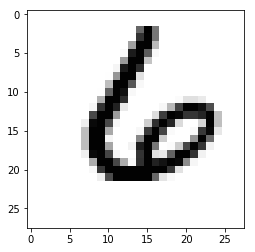

In [28]:
test(5012)

In [29]:
interact_manual(test,測試編號=(0,9999))

interactive(children=(IntSlider(value=4999, description='測試編號', max=9999), Button(description='Run Interact', …

<function __main__.test(測試編號)>